In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data  = pd.read_csv('data/pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
data.shape

(800, 13)

In [7]:
data.Name=data.Name.str.replace(".*(?=Mega)","")
data.head()

/tmp/ipykernel_37816/648141814.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.Name=data.Name.str.replace(".*(?=Mega)","")


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
data =  data.set_index('Name')
data = data.drop(['#'],axis=1)
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
data['Type 2'].fillna(data['Type 1'],inplace=True)
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [12]:
data.isna().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [14]:
# unique ytpes

print(data['Type 1'].unique())
print(data['Type 2'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost']


In [16]:
print(data['Type 1'].value_counts())


Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [17]:
print(data['Type 2'].value_counts())

Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64


Strongest and weakest Pokemon

In [22]:
stongest = data.sort_values(by='Total', ascending=False)
stongest.drop_duplicates(subset='Type 1', keep='first', inplace=True)
stongest

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


Weakest

In [23]:
weakest = data.sort_values(by='Total', ascending=True)
weakest.drop_duplicates(subset='Type 1', keep='first', inplace=True)
weakest

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Sunkern,Grass,Grass,180,30,30,30,30,30,30,2,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Magikarp,Water,Water,200,20,10,55,15,20,80,1,False
Pichu,Electric,Electric,205,20,40,15,35,35,60,2,False
Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Poochyena,Dark,Dark,220,35,55,35,30,30,35,3,False


Fastest and slowest

In [25]:
fastest = data.sort_values(by='Speed', ascending=False)
fastest.drop_duplicates(subset='Type 1', keep='first', inplace=True)
fastest

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,True
Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
Electrode,Electric,Electric,480,60,50,70,80,80,140,1,False
Mega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False
Mega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


In [26]:
slowest = data.sort_values(by='Speed', ascending=True)
slowest.drop_duplicates(subset='Type 1', keep='first', inplace=True)
slowest

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Munchlax,Normal,Normal,390,135,85,40,40,85,5,4,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
Bonsly,Rock,Rock,290,50,80,95,10,45,10,4,False
Trapinch,Ground,Ground,290,45,100,45,45,45,10,3,False
Wooper,Water,Ground,210,55,45,45,25,25,15,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Litwick,Ghost,Fire,275,50,30,55,65,55,20,5,False
Torkoal,Fire,Fire,470,70,85,140,85,70,20,3,False


In [27]:
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:xlabel='Type 2', ylabel='count'>

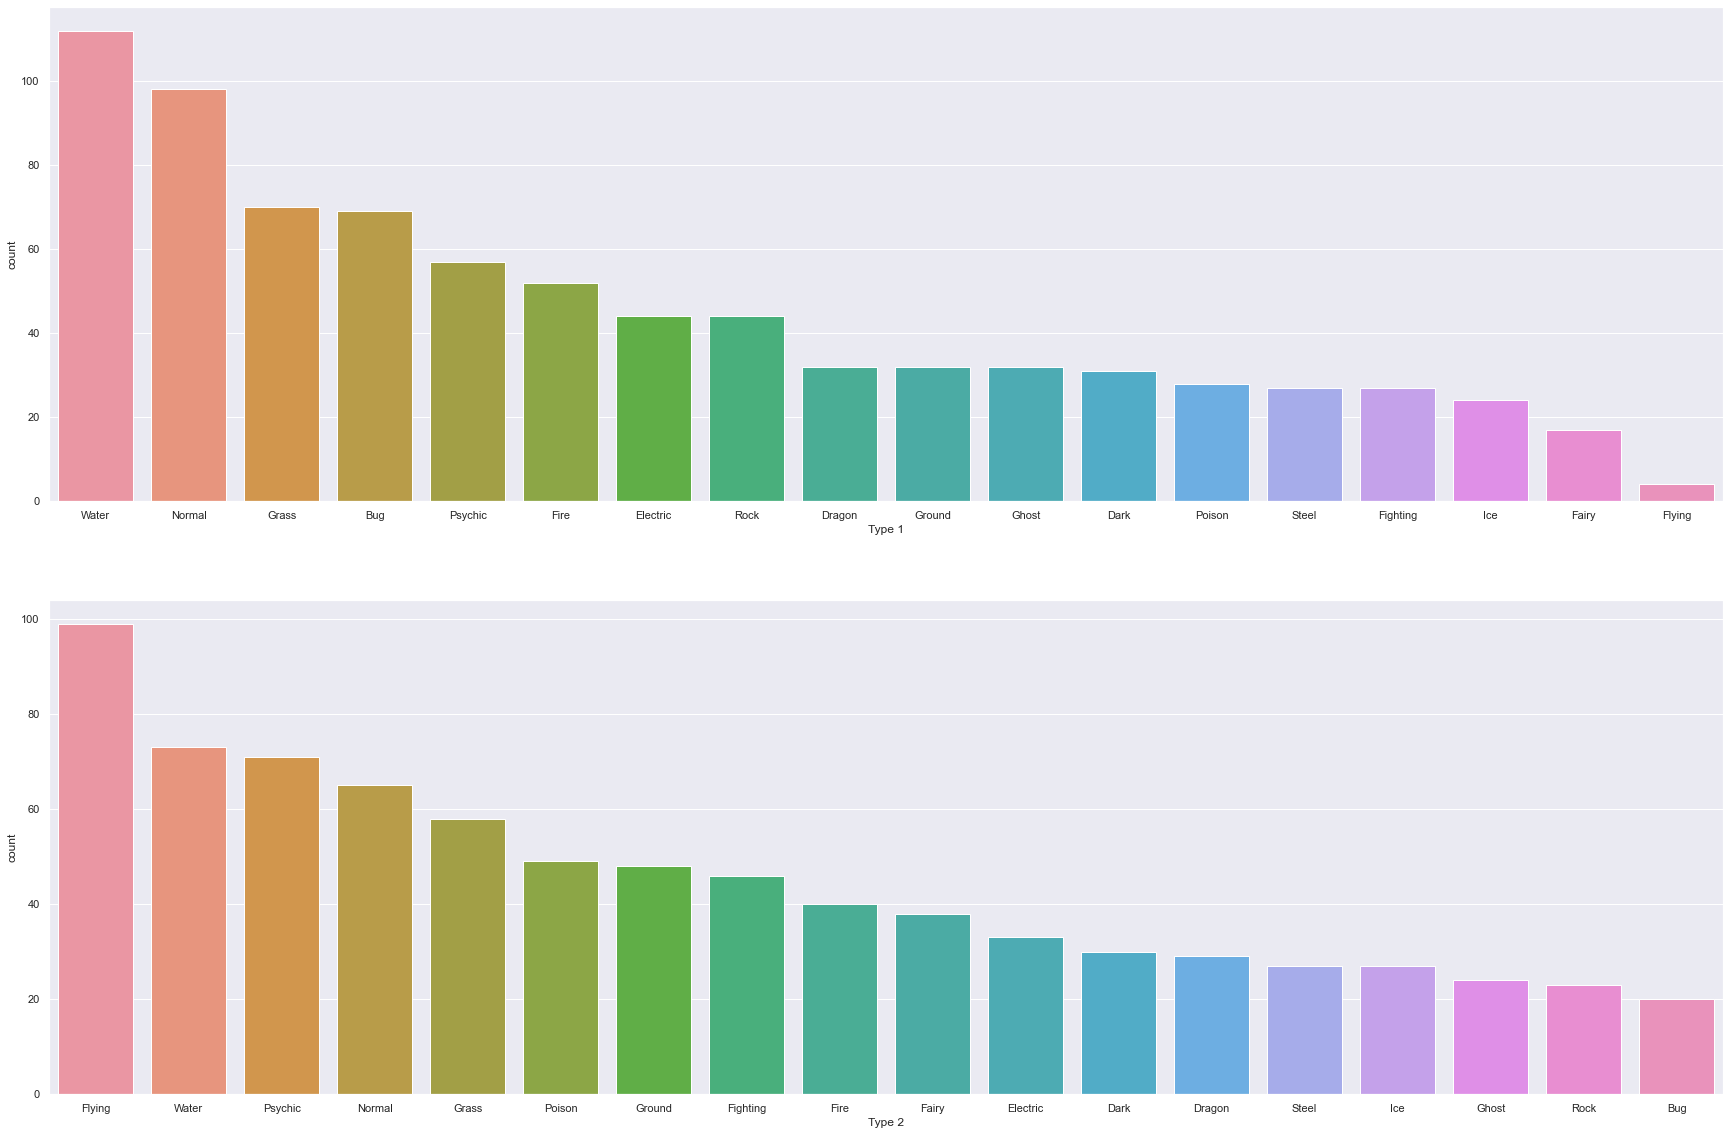

In [39]:
# Visulisation

sns.set(style='darkgrid')
fig,ax=plt.subplots(2,1,figsize=(30,20))

sns.countplot(x='Type 1',data=data,order=data['Type 1'].value_counts().index,ax=ax[0])
sns.countplot(x='Type 2',data=data,order=data['Type 2'].value_counts().index,ax=ax[1])

In [43]:
types_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0, 'Flying' : 0}

type_1 = data['Type 1']
type_2 = data['Type 2']

for i in range(len(type_1)):
    # first we check if the type is in the dictionary
    types_count[type_1[i]] += 1 # if it is, we add 1 to the count
    # now we count the second type if it is not the same as the first type to prevent double counting
    if type_2[i] != type_1[i]:
        types_count[type_2[i]] += 1

for t in types_count:
    print(t,'\t=',types_count[t])



Grass 	= 95
Fire 	= 64
Water 	= 126
Bug 	= 72
Normal 	= 102
Poison 	= 62
Electric 	= 50
Ground 	= 67
Fairy 	= 40
Fighting 	= 53
Psychic 	= 90
Rock 	= 58
Ghost 	= 46
Ice 	= 38
Dragon 	= 50
Dark 	= 51
Steel 	= 49
Flying 	= 101


In [ ]:
type2_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}



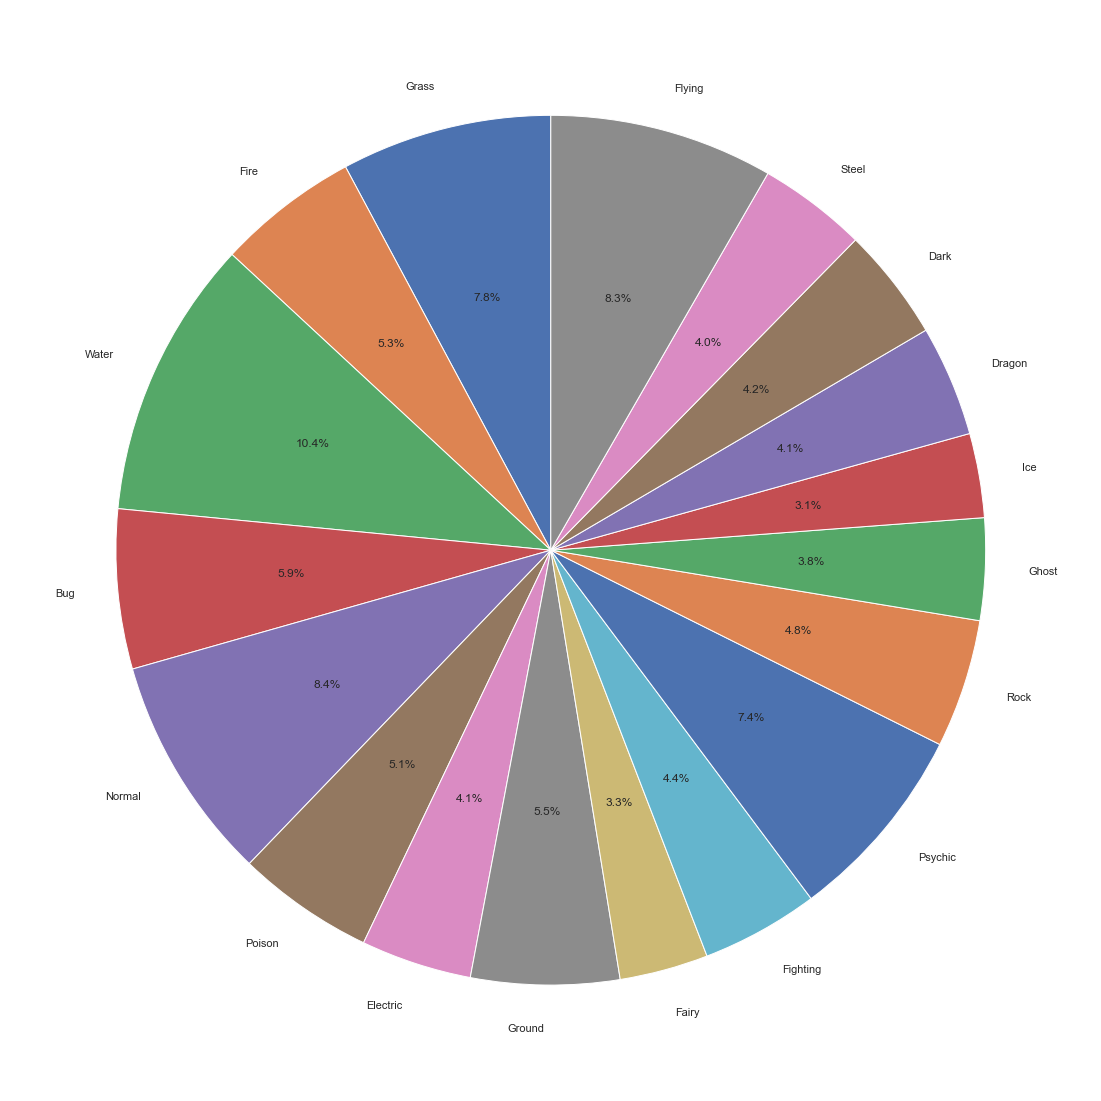

In [51]:
fig,ax=plt.subplots(figsize=(30,20))
lables = 'Grass','Fire','Water','Bug','Normal','Poison','Electric','Ground','Fairy','Fighting','Psychic','Rock','Ghost','Ice','Dragon','Dark','Steel','Flying'

size0=list(types_count.values())

plt.pie(size0,labels=lables,autopct='%1.1f%%',startangle=90)
plt.show()

In [52]:
# Analysing all ratio data

stats=data.drop(['Generation','Total','Legendary'],axis=1)
stats.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45
Ivysaur,Grass,Poison,60,62,63,80,80,60
Venusaur,Grass,Poison,80,82,83,100,100,80
Mega Venusaur,Grass,Poison,80,100,123,122,120,80
Charmander,Fire,Fire,39,52,43,60,50,65


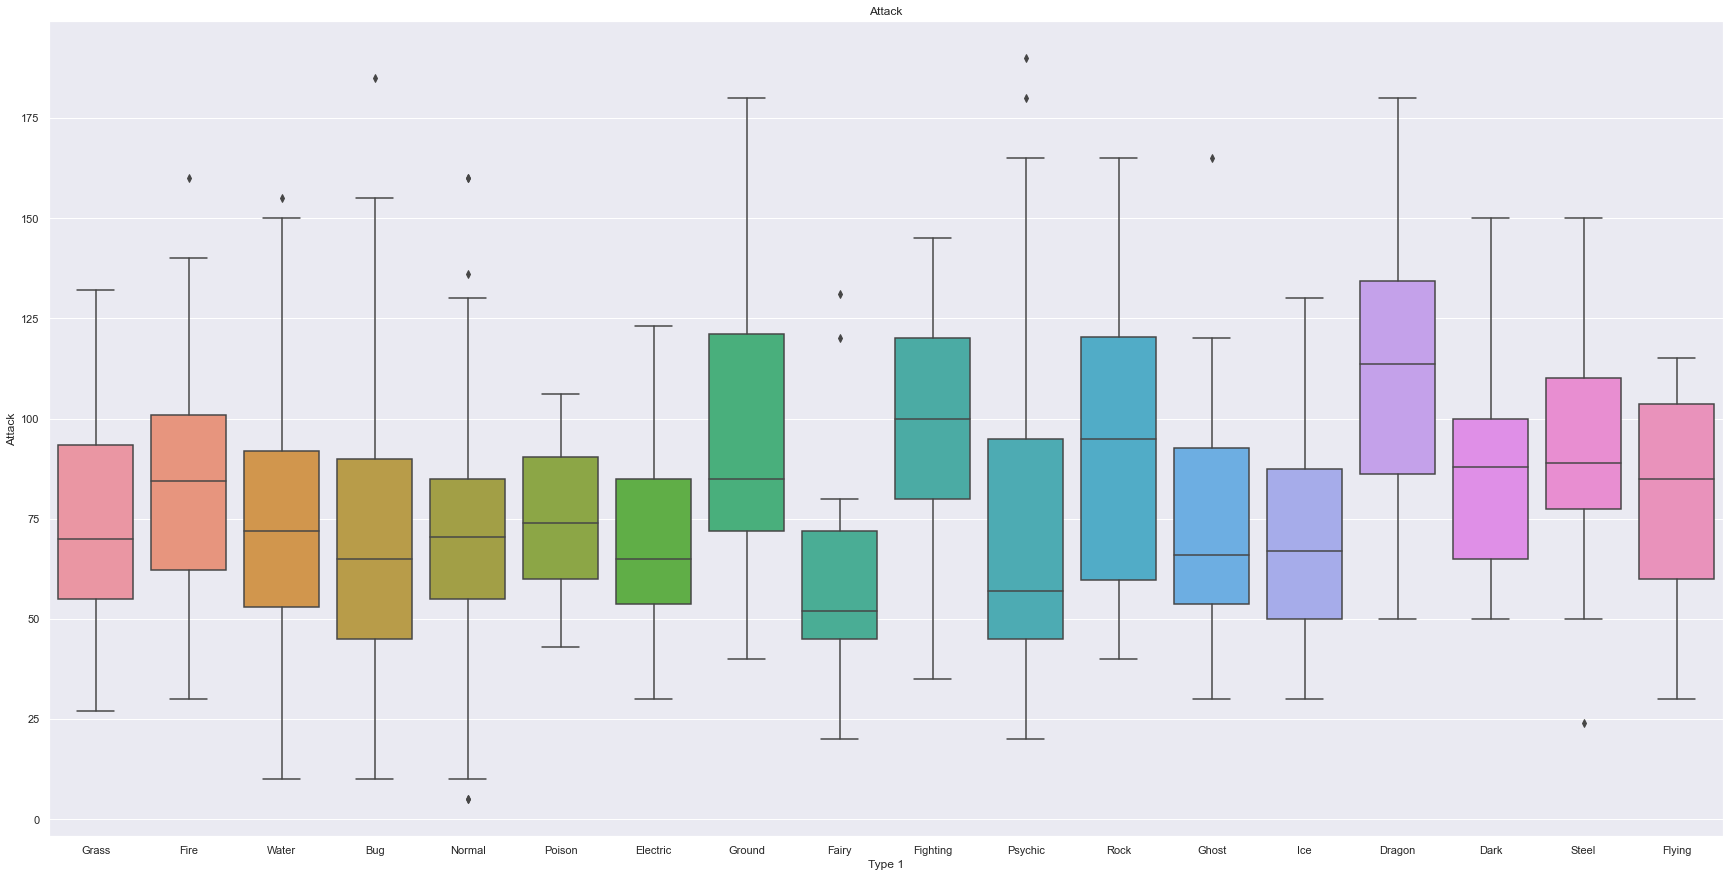

In [65]:
sns.set(style='darkgrid')
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax = sns.boxplot(x='Type 1',y='Attack',data=stats)
ax.set_title('Attack')
plt.show()

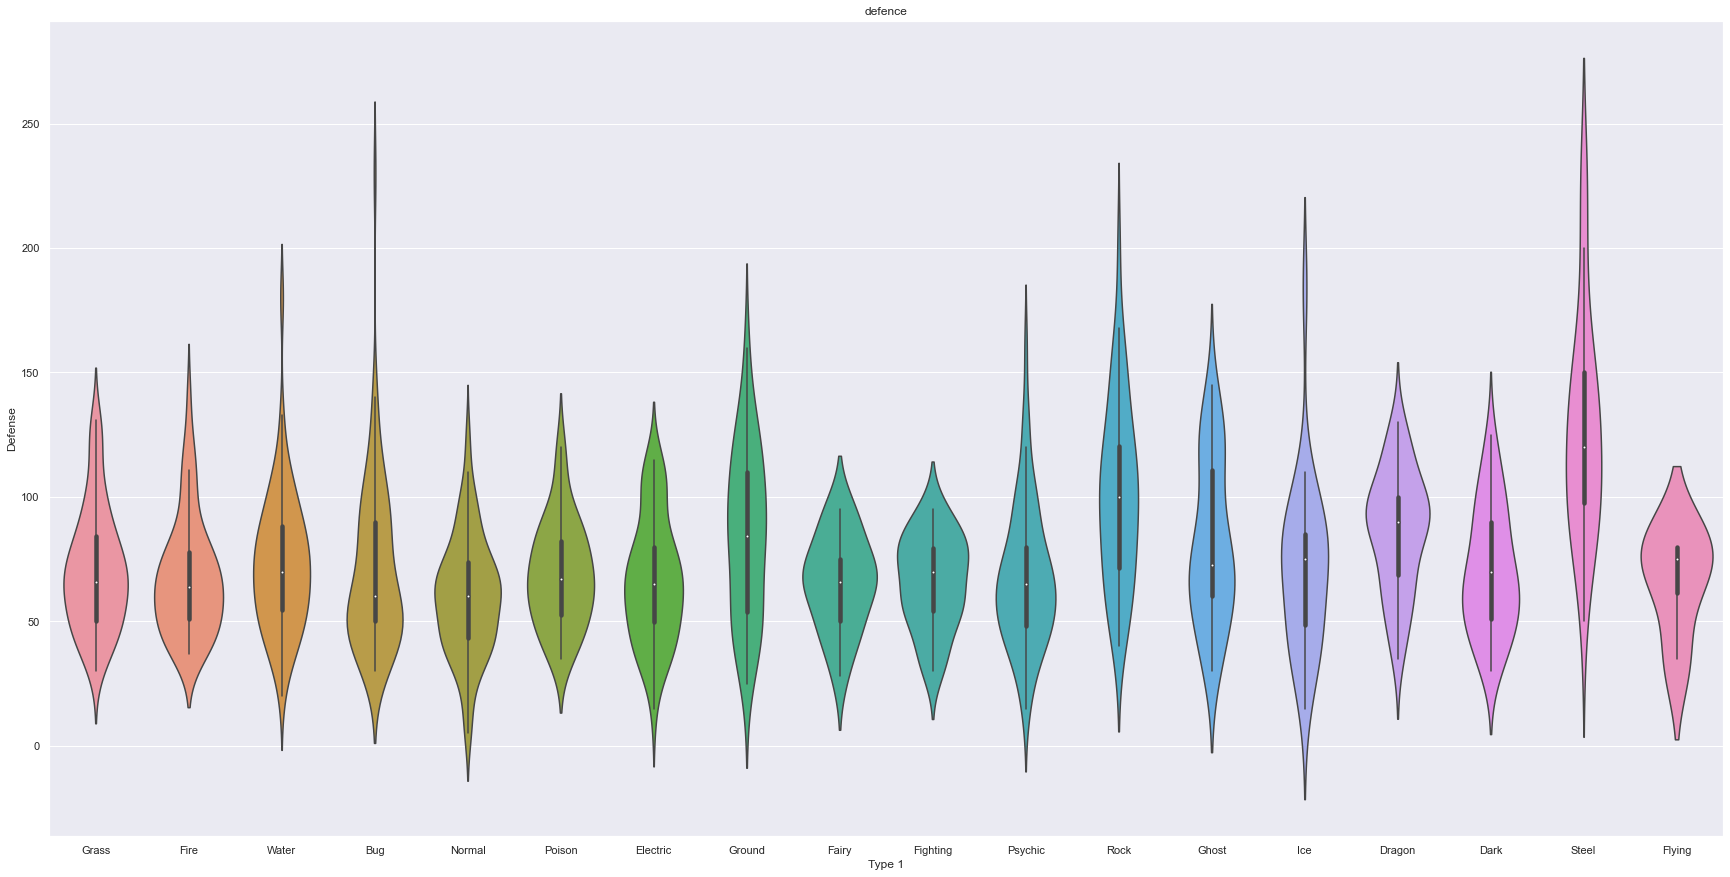

In [64]:
sns.set(style='darkgrid')
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax = sns.violinplot(x='Type 1',y='Defense',data=stats)
ax.set_title('defence')
plt.show()

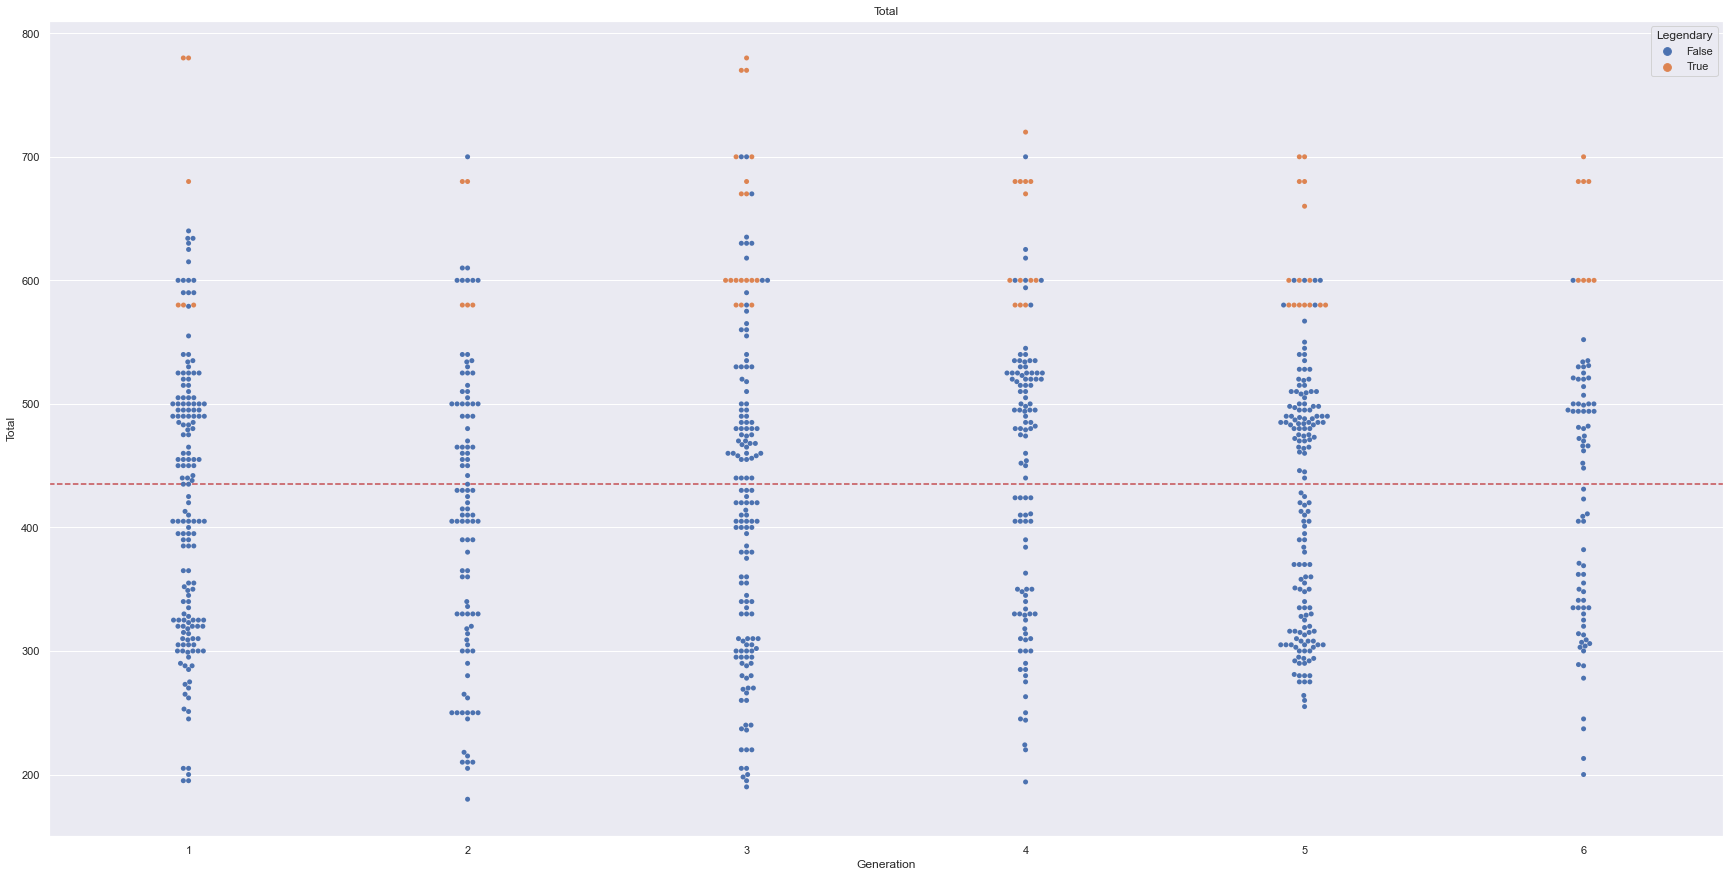

In [69]:
sns.set(style='darkgrid')
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax = sns.swarmplot(x='Generation',y='Total',data=data, hue='Legendary')
ax.set_title('Total')
ax.axhline(y=data['Total'].mean(), color='r', linestyle='--')
plt.show()

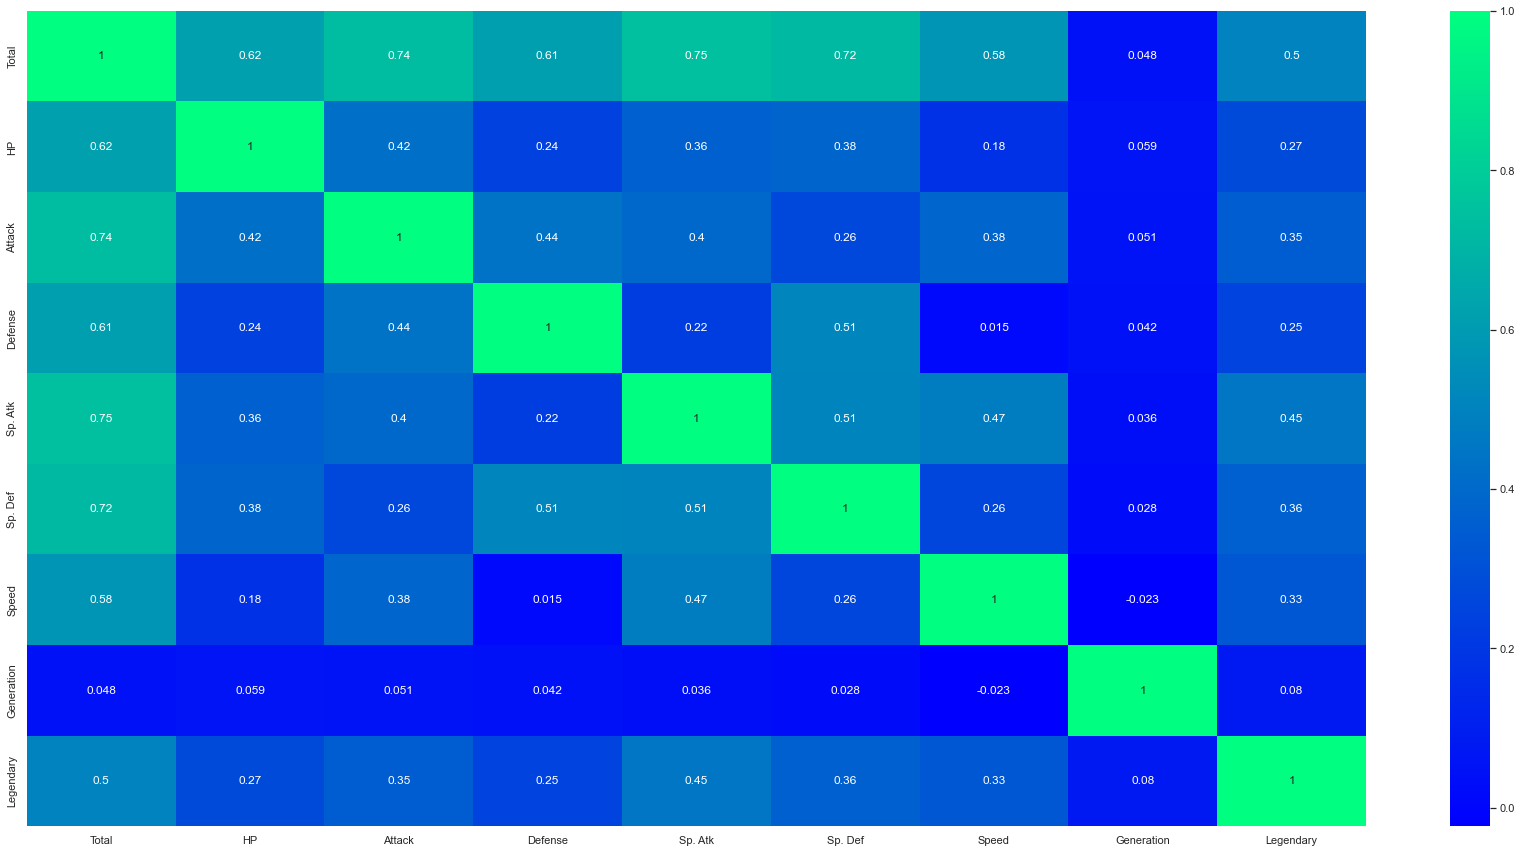

In [76]:
f,ax=plt.subplots(1,1,figsize=(30,15))
ax = sns.heatmap(data.corr(),annot=True,cmap='winter')